**Procedural Oriented Programming (POP)**   
is a programming paradigm that is based on procedures (also called functions or routines), a sequence of instructions that operate on data. It focuses on how to perform tasks step by step.  

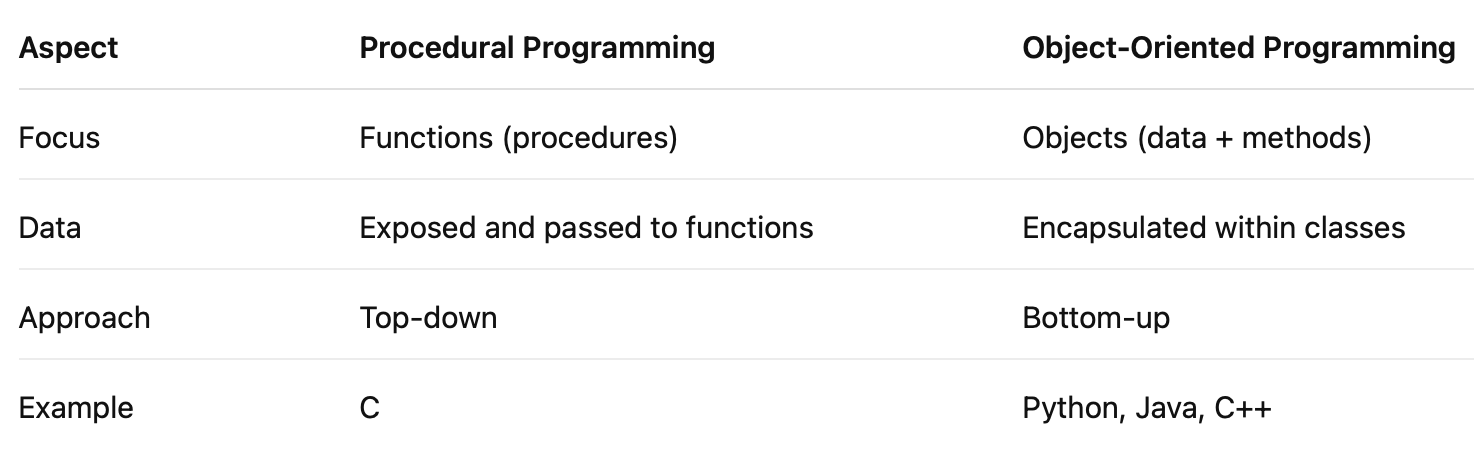 

**Object Oriented Programing (OOP):** 

it’s a programming paradigm centered around **objects** — entities that combine **data (attributes)** and **behavior (methods)** — instead of just functions or procedures.  
e.g.: JAVA (must use), C++ (optional), Python (optional)  
- Class - Blueprint / Template
- Instance - Actual object from Class
- Attributes - data / properties of a class
- Methods - Bahavior (What it can do as a function)

# 1. Classes and Objects

## Class Definition

In [7]:
class Dog: # use PascalCase for class name
    # Class attribute
    species = "Mammal"
    count = 0
    
    # initializer/ constructor method
    # auto runs when create a new instance
    def __init__(self, name, age):
        self.name = name
        self.age = age
        Dog.count += 1 # increases the total count of dogs each time one is made
        
    # instance method
    # Operates on the instance (self)
    def bark(self):
        print(f"{self.name} says woof!")
        
    def eat(self, food):
        print(f"{self.name} is eating {food}")
        
    @classmethod
    def from_birth_year(cls, name, birth_year):
        age = 2025 - birth_year
        return cls(name, age)
        
    #static method - class method
    @staticmethod
    def is_valid_food(food):
        return food != 'onion'

# Instance Creation and Attribute Access
dog_1 = Dog("Buddy", 2)
dog_2 = Dog("Max", 5)
print(dog_1.name, dog_1.age)
print(dog_1 is dog_2)

# Instance Method
dog_1.bark()
dog_1.eat('Bone')

Buddy 2
False
Buddy says woof!
Buddy is eating Bone


## Class Attributes
Class attributes belong to the class itself (shared by all instances).
- Every dog is a Mammal, so species is shared.
- count keeps track of how many Dog objects have been created.
- Each time a new dog is made, we increment it inside __init__.

In [2]:
print(dog_1.species)  # Access via instance
print(Dog.species)    # Access via class
print(Dog.count)

Mammal
Mammal
2


## Class Method  
- Decorated with `@classmethod`, which means:
  - It receives the **class (cls)** as the first argument instead of an instance.
- Useful for **creating objects in alternative ways**.
- Here, instead of passing age directly, you can create a dog using a birth year.

In [3]:
dog_3 = Dog.from_birth_year('Blackie', 2020)
print(dog_3.age)

5



## Static Method
a regular function placed inside a class for **organizational reasons** that: 
- Doesn’t take self or cls: it’s **independent logic** related to the class.
- Belongs logically to the class but doesn’t need to access attributes.  

why use it:
- conceptually as part of the class, but **doesn’t need to access or modify the class or instance data**.
- It helps group related logic together, even if it doesn’t touch the class attributes.

In [9]:
print(Dog.is_valid_food('chicken'))
print(dog_1.is_valid_food('chicken'))
print(dog_1.is_valid_food('onion'))  # False (but works syntactically)

True
True
False


The method checks if a food is valid for a dog. It doesn’t need to know:
- Which dog (no self)
- The class attributes (no cls)
- But logically, it belongs to Dog, not to some random utility file.

## Adding Attributes Dynamically
You can add attributes outside the class, but it’s not recommended, it breaks structure and consistency.
- Other dogs (e.g., dog_2) won’t have this attribute unless added manually.

In [6]:
# Not Recommend
dog_1.color = 'black'
print(dog_1.color)

black


# 2. Magic methods a.k.a. Dunder Methods
“Dunder” means Double UNDerscore (e.g., `__init__`, `__len__`, `__eq__`).  

These are special methods that Python **calls automatically** when you use built-in operations (like +, ==, len(), print(), etc.).  

They let your classes behave **like built-in Python types**, e.g., lists, strings, or numbers
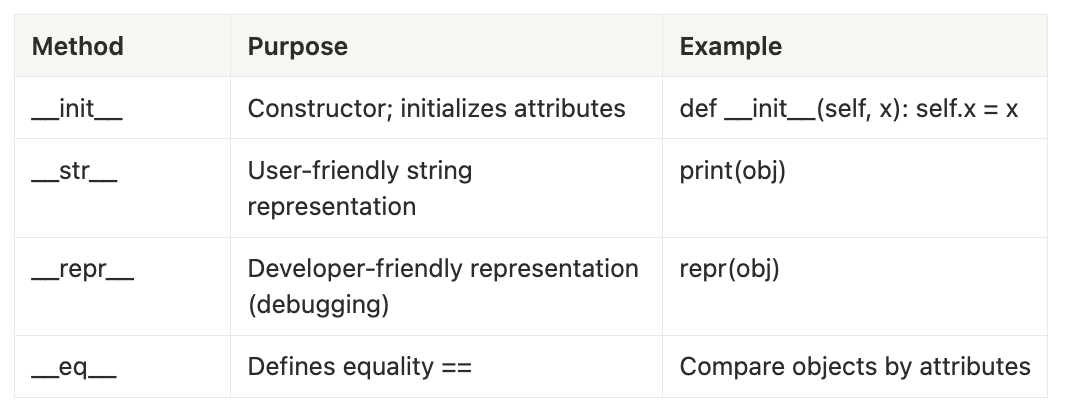

## Dog example

In [26]:
class Dog:
    def __init__(self, name, age):
        self.name = name
        self.age = age
    
    def __str__(self):
        return f"{self.name} is {self.age} years old"
    
    def __eq__(self, other):
        return self.name == other.name and self.age == other.age

In [27]:
class Dog_with_repr:
    def __init__(self, name, age):
        self.name = name
        self.age = age
    
    def __str__(self):
        return f"{self.name} is {self.age} years old"
    
    def __eq__(self, other):
        return self.name == other.name and self.age == other.age
    
    def __repr__(self):
        return f"Dog(name='{self.name}', age={self.age})"

 ### `__init__(self, ...)`
- Called when you create an object.
- Initializes instance attributes.

Automatically runs Dog.__init__(dog_1, 'max', 5): 

In [28]:
dog_1 = Dog('max', 5)
dog_2 = Dog('max', 5)

### `__str__(self)`
- Called when you use **print(object) or str(object)**.
- Defines the human-readable representation of the object.
- If it wasn’t defined, Python would print something like: <__main__.Dog object at 0x7f8a...>

In [29]:
print(dog_1)   # Output: "max is 5 years old"
print(str(dog_1))
print(dog_1)
dog_1

max is 5 years old
max is 5 years old
max is 5 years old


### `__eq__(self, other)`
- Called when you use the equality operator == between two objects.
- Defines what it means for two objects to be equal.
- **Without** it, Python would compare **memory locations**, and the result would be False.

In [30]:
dog_1 = Dog('max', 5)
dog_2 = Dog('max', 5)
print(dog_1 == dog_2) 

True


### `__repr__(self)`
- repr stands for representation.
- It defines the **developer-friendly string** shown when you inspect an object in code (e.g., typing its name in a REPL, or using repr(object)).
- It’s meant to be **unambiguous** and ideally look like something that could be **used to recreate the object**.
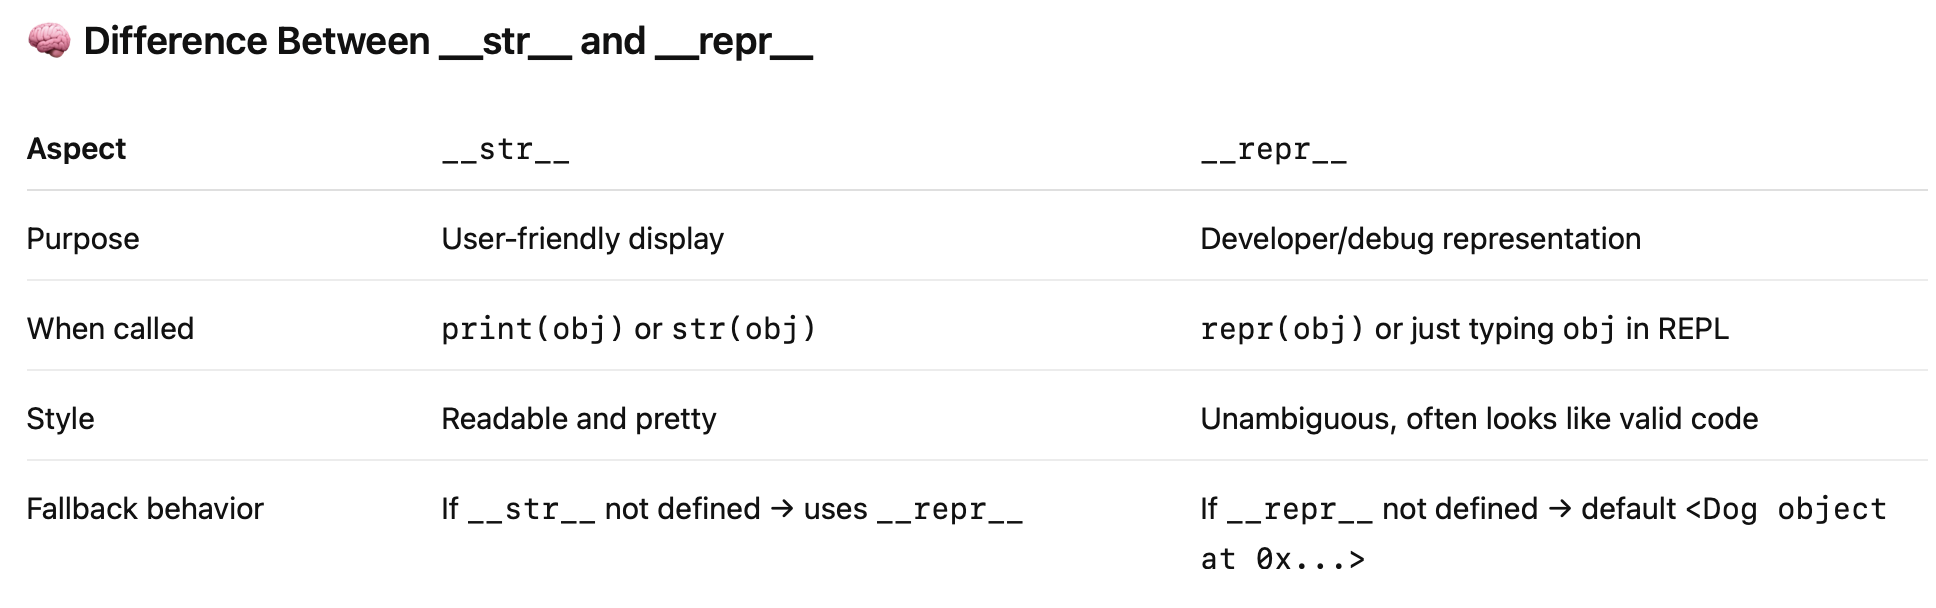

In [31]:
dog_3 = Dog_with_repr("Buddy", 3)

print(dog_3)         # Uses __str__
print(repr(dog_3))   # Uses __repr__

dog_3                
# In interactive mode (like Jupyter), __repr__ is shown automatically
# without it, this will just show like: <__main__.Dog at 0x1076fa830>

Buddy is 3 years old
Dog(name='Buddy', age=3)


Dog(name='Buddy', age=3)

In [34]:
dog_1 = Dog("Buddy", 3)
dog_2 = Dog("Max", 5)
dogs = [dog_1, dog_2]
print(dogs)
dogs

[<__main__.Dog object at 0x10bb74460>, <__main__.Dog object at 0x10bb74fa0>]


[<__main__.Dog at 0x10bb74460>, <__main__.Dog at 0x10bb74fa0>]

In [35]:
dog_1 = Dog_with_repr("Buddy", 3)
dog_2 = Dog_with_repr("Max", 5)
dogs = [dog_1, dog_2]
print(dogs)
dogs

[Dog(name='Buddy', age=3), Dog(name='Max', age=5)]


[Dog(name='Buddy', age=3), Dog(name='Max', age=5)]

A common practice is to make `__repr__` the more complete one, and let `__str__` reuse it:  
`def __str__(self):    
    return self.__repr__()`  

Use this shortcut when:  
- You don’t need a separate “pretty” `__str__` for users.
- You prefer consistent, debug-friendly output everywhere.

## Shopping Cart Example

In [36]:
class ShoppingCart:
    def __init__(self, items):
        self.items = items
        
    def __len__(self):
        return len(self.items)
    
    @property
    def length(self):
        return len(self.items)

### `__len__(self)`
- Called **automatically** when you use the built-in function **len(object)**.
- Lets you define **what length means for your class**.


In [37]:
# Python internally calls ShoppingCart.__len__(cart1)
cart1 = ShoppingCart(['computer', 'basketball', 'shampoo'])
print(len(cart1))

3


### `@property`
- Turns **a method into an attribute**, so you can access it **without parentheses (**).
- Useful for **computed attributes** that **shouldn’t be modified directly**.

In [38]:
print(cart1.length)

3


### more magic methods

In [40]:
class ShoppingCart:
    def __init__(self, items=None):
        if items is None:
            items = []
        self.items = items

    # Display friendly string (user-friendly)
    def __str__(self):
        return f"ShoppingCart with items: {', '.join(self.items)}"

    # Developer-friendly representation
    def __repr__(self):
        return f"ShoppingCart(items={self.items})"

    # Length of the cart
    def __len__(self):
        return len(self.items)

    # Allow indexing: cart[0]
    def __getitem__(self, index):
        return self.items[index]

    # Allow assignment: cart[0] = 'milk'
    def __setitem__(self, index, value):
        self.items[index] = value

    # Allow deletion: del cart[1]
    def __delitem__(self, index):
        del self.items[index]

    # Add two carts together
    def __add__(self, other):
        if isinstance(other, ShoppingCart):
            return ShoppingCart(self.items + other.items)
        raise TypeError("Can only add ShoppingCart to ShoppingCart")

    # Check if item is in cart
    def __contains__(self, item):
        return item in self.items
    
cart1 = ShoppingCart(['computer', 'basketball', 'shampoo'])
cart2 = ShoppingCart(['milk', 'eggs'])

# __str__ and __repr__
print(cart1)          # ShoppingCart with items: computer, basketball, shampoo
print(repr(cart1))    # ShoppingCart(items=['computer', 'basketball', 'shampoo'])

# __len__
print(len(cart1))     # 3

# __getitem__, __setitem__, __delitem__
print(cart1[0])       # computer
cart1[1] = 'soccer ball'
del cart1[2]
print(cart1)          # ShoppingCart with items: computer, soccer ball

# __add__ (combine two carts)
cart3 = cart1 + cart2
print(cart3)          # ShoppingCart with items: computer, soccer ball, milk, eggs

# __contains__
print('milk' in cart3)  # True
print('shampoo' in cart3)  # False

ShoppingCart with items: computer, basketball, shampoo
ShoppingCart(items=['computer', 'basketball', 'shampoo'])
3
computer
ShoppingCart with items: computer, soccer ball
ShoppingCart with items: computer, soccer ball, milk, eggs
True
False


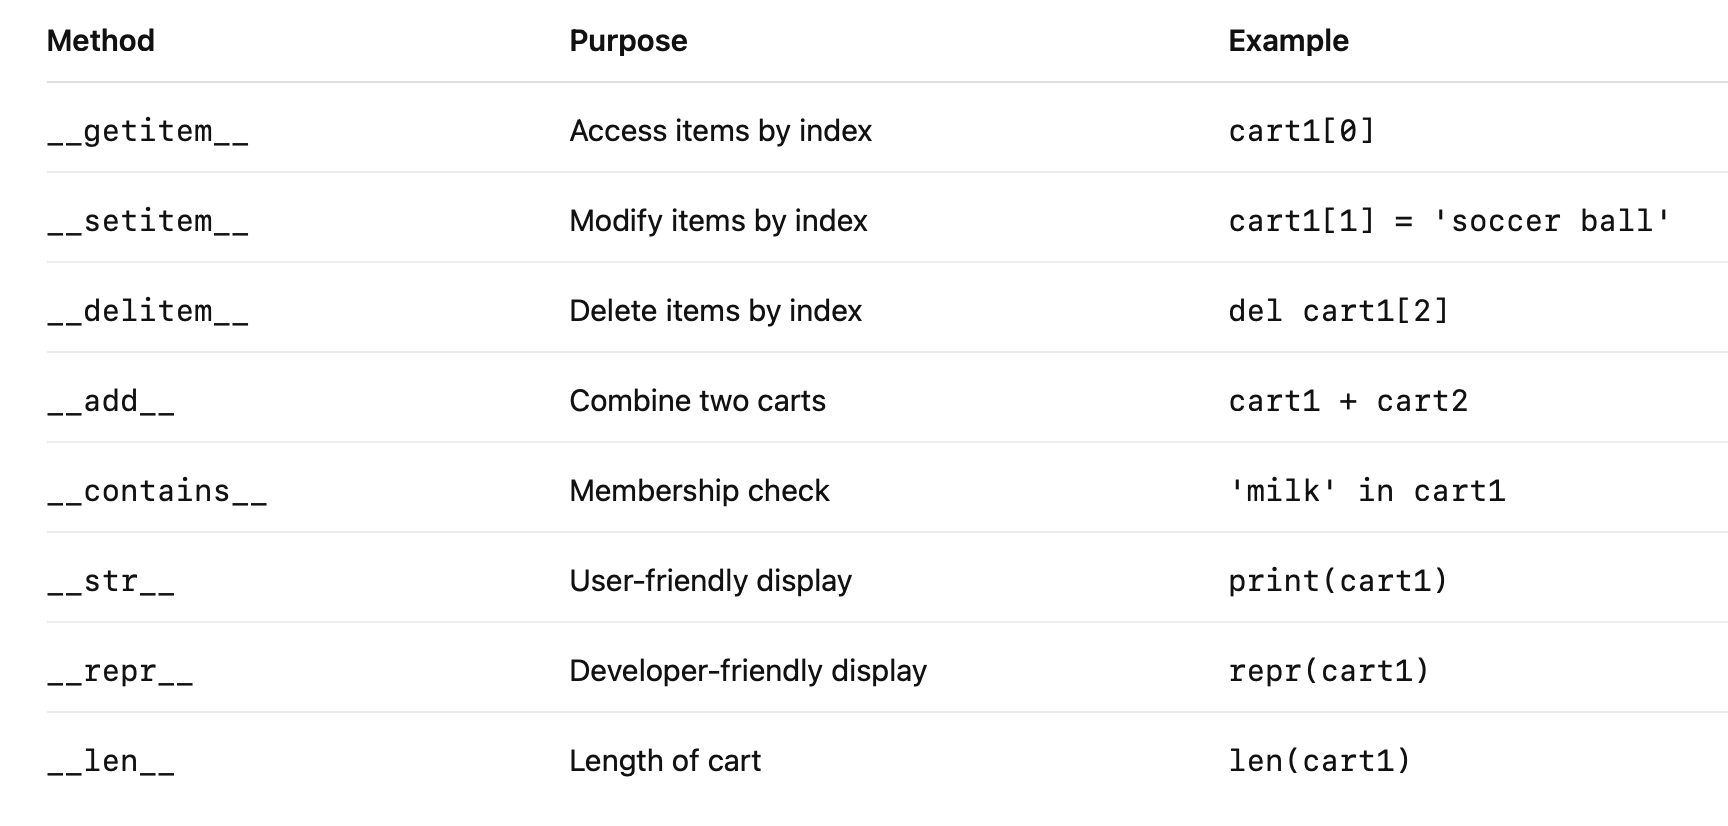

## ✅ Key Takeaways
1.	With magic methods, your class behaves like a built-in Python type.
2.	Users can index, delete, add, check membership, just like a list.
3.	You can control friendly display and debug representation with `__str__` and `__repr__`.
4. 🔹 Magic Methods Are Special
- Magic methods always have double underscores before and after
- Python looks for these exact names when performing operations: print(obj) → looks for `__str__`
- If you rename them, e.g., repre instead of `__repr__`, Python won’t recognize it. It will just be a normal method.

# 3. OOP 4 pillars

## Encapsulation
Bundling data (attributes) and methods (functions) that operate on that data into a single unit (a class), while also restricting direct access to some of the object’s internal components.  

Encapsulation = **“data hiding” + “controlled access”** 

It helps:
- Protect data from accidental modification
- Maintain control over how attributes are read or updated
- Make code easier to maintain and debug  

Python doesn’t enforce strict access control like Java or C++.
Instead, it uses **naming conventions** to indicate **how attributes and methods should be treated**:  
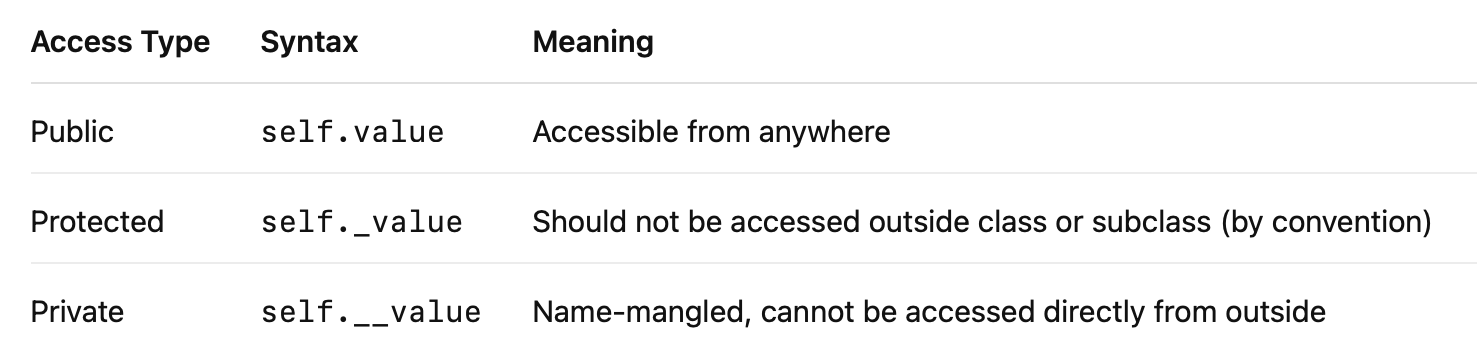

### public, protected, private

In [49]:
class BankAccount:
    def __init__(self, account_number, balance):
        # Public attribute
        self.account_number = account_number
        
        # Protected attribute - internal use attribute( not for public)
        self._balance = balance
        
        # private attribute - can be used within this class only
        self.__pin = '1234'
    
    # public method
    def get_balance(self, currency):
        if currency == 'RMB':
            return self._balance * 7
        return self._balance
    
    def deposit(self, amount):
        if amount > 0:
            self._balance += amount
            print(f"Deposited ${amount}. New balance: ${self._balance}")
        else:
            print("Invalid deposit amount")
    
    # Private method
    def __validate_pin(self, pin):
        return self.__pin == pin
    
    def login(self, account_number, pin):
        if self.__validate_pin(pin): 
            print(f'Welcom {self.account_number}')
        else:
            print('Incorrect PIN')

    # Public method accessing private data safely
    def withdraw(self, amount, pin):
        if self.__validate_pin(pin):
            if amount <= self._balance:
                self._balance -= amount
                print(f"Withdrew ${amount}. Remaining balance: ${self._balance}")
            else:
                print("Insufficient funds")
        else:
            print("Incorrect PIN")
        
       
account_1 = BankAccount(123, 999)
# access public attribute
print(account_1.account_number)
# access protected attribute
print(account_1._balance)
# cannot access private attribute
# AttributeError: 'BankAccount' object has no attribute '__pin'
# print(account_1.__pin)

# access public method
account_1.login(123, '123')
account_1.deposit(1000)
account_1.withdraw(500, '1234')
account_1.withdraw(2000, '1234')

# cannot access private method
# AttributeError: 'BankAccount' object has no attribute '__validate_pin'
# account_1.__validate_pin('abc')


123
999
Incorrect PIN
Deposited $1000. New balance: $1999
Withdrew $500. Remaining balance: $1499
Insufficient funds


### Setter and Getter
To read or modify private attributes safely

In [51]:
# setter & getter
class Temperature:
    def __init__(self, celsius):
        self._celsius = celsius
        
    # Getter
    # Allows access to _celsius like an attribute (temp_1.celsius)
    @property    
    def celsius(self):
        return self._celsius
    
    # Getter
    @property
    def fahrenheit(self):
        return self._celsius * 9 / 5 + 32
    
    # Setter for celsius
    # protects the object from invalid data
    @celsius.setter
    def celsius(self, value):
        if value < -273:
            raise ValueError('Cannot be lower than absolute zero')
    
        self._celsius = value
        
    @fahrenheit.setter    
    def fahrenheit(self, value):
        self._celsius = (value - 32) * 5 / 9
    

temp_1 = Temperature(30)
print('original:')
print(temp_1.celsius)
print(temp_1.fahrenheit)

print('change the celsius degree:')
temp_1.celsius = 22
print(temp_1.celsius)
print(temp_1.fahrenheit)

print('change the fahrenheit degree:')
temp_1.fahrenheit = 77
print(temp_1.celsius)
print(temp_1.fahrenheit)

original:
30
86.0
change the celsius degree:
22
71.6
change the fahrenheit degree:
25.0
77.0


## Inheritance
One class (child) can inherit properties and methods from another (parent).  

It promotes code reuse and hierarchical relationships.

In [52]:
class Animal:
    def __init__(self, name):
        self.name = name
        
    def speak(self):
        print(f"{self.name} make a sound")
        
    def eat(self, food):
        print(f"{self.name} is eating {food}")

# Child classes inherit Animal’s methods  
class Dog(Animal):   
    def __init__(self, name, type):
        super().__init__(name)
        self.type = type
        
    # overriding parent class method
    def speak(self):
        #  super().speak() call parent method
        print(f"{self.name} of {self.type} make a woof!")
        
class Cat(Animal):
    def speak(self):
        print(f"{self.name} make a meow!")

dog_1 = Dog('Max', 'Golden doodle')
print(dog_1.name)
dog_1.eat('bone')
dog_1.speak()

cat_1 = Cat('Sophie')
cat_1.speak()
cat_1.eat('fish')


Max
Max is eating bone
Max of Golden doodle make a woof!
Sophie make a meow!
Sophie is eating fish


Overriding lets subclasses customize or replace parent class behavior

### Multiple Inheritance
! use carefully to avoid confusion.


In [53]:
class A:
    def greet(self):
        print('A')
        
        
class B:
    def run(self):
        print('run')
        
# similar to the implemente in other OOP        
class C(A, B):
    pass

c = C()
c.greet()
c.run()

A
run


## Polymorphism & Abstraction
**Polymorphism**:  
**Same method name**, different implementations across classes. It allows objects of **different classes** to be treated uniformly.  

**Abstraction**:
define the interface, not implementation. Hiding implementation details and showing only what’s necessary.
- Done through abstract base classes (ABCs) and abstract methods.
- Abstract classes **cannot be instantiated directly**.
- They define the required methods that all subclasses must implement.

### Without polymorphism or abstraction

In [ ]:
class BadCircle:
    def __init__(self, radius):
        self.radius = radius
    
    def circle_area(self):
        return 3.14 * self.radius**2

    def circle_perimeter(self):
        return 2 * 3.13 * self.radius

class BadRetangle:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        
    def retangle_area(self):
        return self.width * self.height

    def retangle__perimeter(self):
        return 2* (self.width + self.height)

⛔ Problem: methods are inconsistent (circle_area, retangle_area) — hard to reuse.

### With Polymorphism + Abstraction

In [55]:
# define a common interface (via an abstract class)
from abc import ABC, abstractmethod

class Shape(ABC):  # Abstract Base Class
    @abstractmethod
    def area(self):
        pass
    
    @abstractmethod
    def perimeter(self):
        pass

# shape_1 = Shape() # raise TypeError!

In [58]:
# Child Classes Implement the Interface
class Retangle(Shape):
    def __init__(self, width, height):
        self.width = width
        self.height = height
    
    def area(self):
        return self.width * self.height

    def perimeter(self):
        return 2* (self.width + self.height)
    
class Circle(Shape):
    def __init__(self, radius):
        self.radius = radius
    
    def area(self):
        return 3.14 * self.radius**2

    def perimeter(self):
        return 2 * 3.13 * self.radius
    
retangle = Retangle(1,1)
circle = Circle(2)

shapes = [retangle, circle]

for shape in shapes:
    print(shape.area())
    print(shape.perimeter())

1
4
12.56
12.52


Both Rectangle and Circle share the same interface (area(), perimeter()), but their behavior differs, that’s polymorphism.

### Without abstraction
Even without inheriting from Shape, your Rectangle and Circle classes still “work” in Python. That’s because Python supports something called “**duck typing**”, a core concept that **allows polymorphism without inheritance**.

In [59]:
class Circle:
    def __init__(self, radius):
        self.radius = radius
    
    def area(self):
        return 3.14 * self.radius**2

    def perimeter(self):
        return 2 * 3.14 * self.radius


class Rectangle:
    def __init__(self, width, height):
        self.width = width
        self.height = height
    
    def area(self):
        return self.width * self.height

    def perimeter(self):
        return 2 * (self.width + self.height)


# Polymorphism still works
shapes = [Circle(3), Rectangle(2, 5)]

for shape in shapes:
    print(shape.area())      # works fine
    print(shape.perimeter()) # works fine

28.26
18.84
10
14


Reason it works:  
Both classes implement the **same method names** (area and perimeter). Python doesn’t care about the class hierarchy, it only checks **if the object supports those methods**.  

why we need abstraction:

In [61]:
class Triangle:
    def __init__(self, side):
        self.side = side
    
    def area(self):
        return (3 ** 0.5 / 4) * self.side ** 2
    # forgot to define perimeter()
    

shapes = [Circle(3), Rectangle(2, 5), Triangle(4)]

for shape in shapes:
    print(shape.area())
    # print(shape.perimeter())  
    # 🚨 Triangle has no perimeter()!

28.26
10
6.928203230275509


Even though duck typing works, Abstract Base Classes (ABC) give you these benefits: 
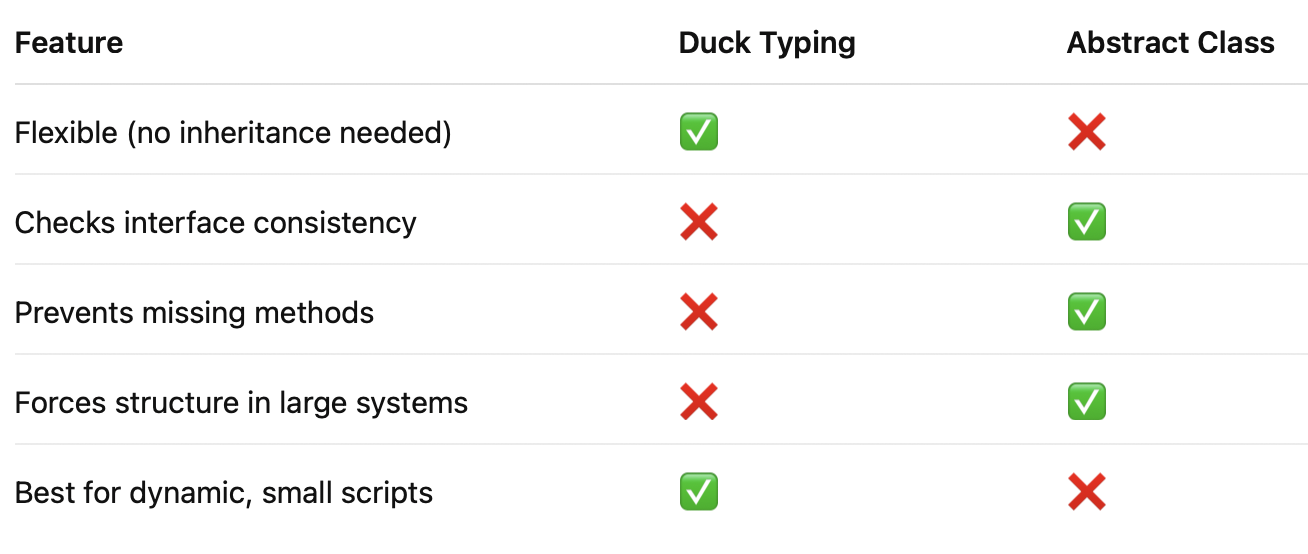

# 4. Design Patterns (OOP Best Practices)
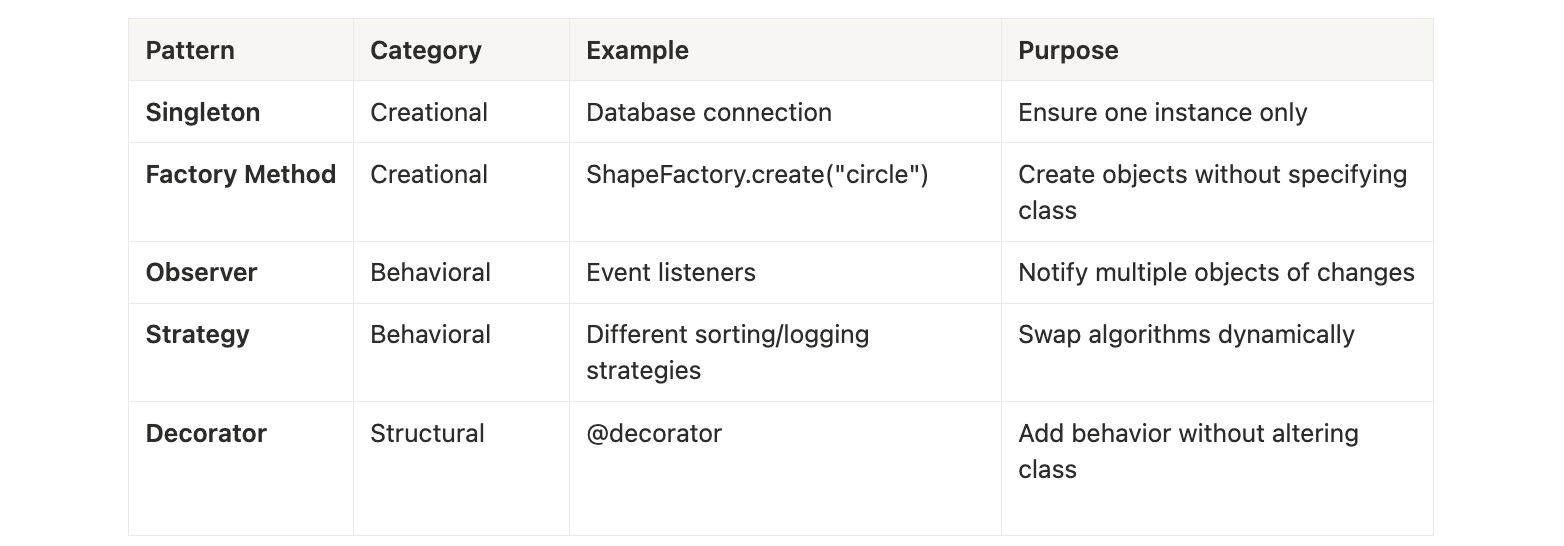


## 1️⃣ Singleton Pattern
The Singleton ensures only one instance of a class exists.

In [1]:
class Logger:
    _instance = None
    
    # def __init__
    def __new__(cls):
        if cls._instance is None:
            cls._instance = super().__new__(cls)
            cls._instance.logs = []
        return cls._instance
    
    def log(self, message):
        self.logs.append(message)
        print(f"log: {message}")

# Test
logger1 = Logger()
logger2 = Logger()

logger1.log("First message")
logger2.log("Second message")

print(logger1 is logger2)  # True
print(logger1.logs)        # ['First message', 'Second message']

log: First message
log: Second message
True
['First message', 'Second message']


Any instance of Logger refers to the same object.

## 2️⃣ Factory Pattern
To create objects without specifying exact classes.

In [2]:
class Animal:
    def __init__(self, name):
        self.name = name
        
    def speak(self):
        print(f"{self.name} makes a sound")
    
    def eat(self, food):
        print(f"{self.name} is eating {food}")

class Dog(Animal):
    def __init__(self, name, breed):
        super().__init__(name)
        self.breed = breed
    
    # overriding parent class method
    def speak(self):
        print(f"{self.name} of breed {self.breed} says Woof!")

class Cat(Animal):
    def speak(self):
        print(f"{self.name} says Meow!")

# Factory separates object creation logic from the main code
class AnimalFactory:
    @staticmethod
    def create_animal(type, name, **kwargs):
        if type == 'cat':
            return Cat(name)
        elif type == 'dog':
            return Dog(name, kwargs.get('breed', 'Unknown'))

# Usage
cat = AnimalFactory.create_animal('cat', 'Kitty')
dog = AnimalFactory.create_animal('dog', 'Buddy', breed='Bulldog')

cat.speak()  # Kitty says Meow!
dog.speak()  # Buddy of breed Bulldog says Woof!

Kitty says Meow!
Buddy of breed Bulldog says Woof!


## 3️⃣ Observer Pattern
Is used for **one-to-many notifications** (subscribers).  
Observers get notified automatically when the subject (Newsletter) changes:

In [3]:
class Newsletter:
    def __init__(self, system_name):
        self.system_name = system_name
        self.subscribers = []
        
    def subscribe(self, email, callback_func=None):
        self.subscribers.append((email, callback_func))
        print(f"{email} subscribed to {self.system_name}")
        
    def unsubscribe(self, email):
        self.subscribers = [s for s in self.subscribers if s[0] != email]
    
    def publish_news(self, news):
        for email, callback_func in self.subscribers:
            print(f"Sending email to {email}: {news}")
            if callback_func:
                callback_func(news)

# Example usage
def my_callback(news):
    print("Callback received:", news)

newsletter = Newsletter("Tech Daily")
newsletter.subscribe("user1@example.com", my_callback)
newsletter.subscribe("user2@example.com")

newsletter.publish_news("New Python tutorial released!")
# user1 will see callback output

user1@example.com subscribed to Tech Daily
user2@example.com subscribed to Tech Daily
Sending email to user1@example.com: New Python tutorial released!
Callback received: New Python tutorial released!
Sending email to user2@example.com: New Python tutorial released!


When newsletter.publish_news("New article!") runs, it automatically calls my_callback with the news. This allows subscribers to react to events differently, depending on the callback.

# 5. SOLID principles
five design principles to make your code more maintainable, scalable, and testable: 
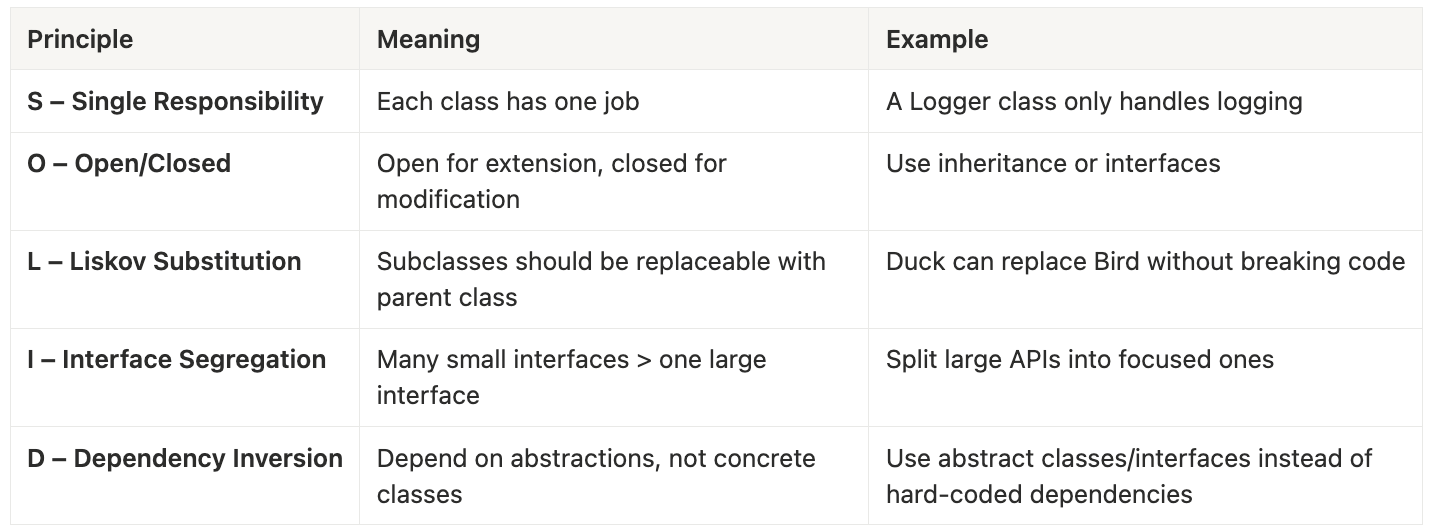

## 1️⃣ Single Responsibility Principle (SRP)
A class should have only **one reason to change**, it should handle **only one functionality**.  

Bad example:

In [ ]:
class User:
    def __init__(self, name):
        self.name = name
    
    def send_email(self):
        print("send email")
    
    def save_to_database(self):
        pass

Problem:
- User class manages data, database operations, and emailing, which are multiple responsibilities.
- If the database system or email logic changes, you must edit User, which violates SRP  

Good example:

In [64]:
class User:
    def __init__(self, name):
        self.name = name
        
class DatabasePersistence:
    def save(self, user):
        print("save to database")
    
class EmailService:
    def send(self, user):
        print(f"send email to {user.name}")

user = User('Steven')
database = DatabasePersistence()
email = EmailService()

email.send(user)
database.save(user)

send email to Steven
save to database


Responsibilities separated:  
- User: holds user data
- DatabasePersistence: saves user
- EmailService: sends email  

✅ Each class now changes for only one reason.

## 2️⃣ Open/Closed Principle (OCP)

A class should be open for extension, but closed for modification.

bad example:

In [ ]:
class AreaCalculator:
    def calcualte(self, shape):
        if(shape.type == 'circle'):
            return 3.14 * shape.redius ** 2
        if(shape.type == 'retangle'):
            pass

Problem:
- Every time a new shape is added (Triangle, Polygon, etc.), you have to modify AreaCalculator — risky and repetitive.  

Good example:   
the Shape -> Retangle & Circle example in the abstract section

In [66]:
from abc import ABC, abstractmethod

class Shape(ABC):
    @abstractmethod
    def area(self):
        pass

class Circle(Shape):
    def __init__(self, radius):
        self.radius = radius
    def area(self):
        return 3.14 * self.radius**2

class Rectangle(Shape):
    def __init__(self, width, height):
        self.width = width
        self.height = height
    def area(self):
        return self.width * self.height

# Now can extend with new shapes without touching AreaCalculator:    
def calculate_area(shape: Shape):
    return shape.area()

rec = Rectangle(2, 3)
print(calculate_area(rec))

6


## 3️⃣ Liskov Substitution Principle (LSP)

Subclasses must be substitutable for their parent classes, meaning they must behave consistently.  

Bad example:

In [67]:
class Bird:
    def fly(self):
        return 'fly high'
    
class Penguin(Bird):
    def fly(self):
        raise Exception('cannot fly')

Problem:
- A Penguin is a Bird, but calling fly() breaks code expectations.
- Violates the idea that child objects should behave like their parents.

Good example:

In [ ]:
class Bird:
    def move(self):
        return "move"

class Sparrow(Bird):
    def move(self):
        print("fly")

class Penguin(Bird):
    def move(self):
        print("walk with feet")

✅ Now, both subclasses support the same interface (move()),
but each has its own valid behavior — LSP respected.

## 4️⃣ Interface Segregation Principle (ISP)
Subclasses should not be forced to implement methods they don’t use.  

Bad example:

In [ ]:
class Worker:
    def work(self):
        pass

    def eat(self):
        pass

class Human(Worker):
    def work(self):
        print('work')

    def eat(self):
        print('eat')
        
class Robot(Worker):
    def work(self):
        print('work')
    
    def eat(self):
        # raise Exception('cannot eat')
        pass

Problem:
- Robot is forced to define eat() even though it doesn’t apply.
- The interface is too broad.

Good example:

In [ ]:
# Split interfaces into smaller ones
class Workable():
    def work(self):
        pass
    
class Eatable():
    def eat(self):
        pass

class Human(Workable, Eatable):
    def work(self):
        print('work')

    def eat(self):
        print('eat')

class Robot(Workable):
    def work(self):
        print('work')

✅ Each class implements only what it needs. 

## 5️⃣ Dependency Inversion Principle (DIP)

High-level modules should depend on abstractions, not concrete implementations.

Bad example:

In [68]:
class MySqlDatabase:
    def connect(self):
        return "connect to mysql"

class UserDatabaseService:
    def __init__(self):
        self.db = MySqlDatabase()  # tightly coupled

    def connect_to_db(self):
        self.db.connect()

Problem:
- UserDatabaseService depends directly on a specific database type.
- Changing to Postgres requires editing UserDatabaseService.

Good example:

In [71]:
class Database():
    def connect(self):
       pass

class MySqlDatabase(Database):
    def connect(self):
        return 'connect to mysql'

class PostgresDatabase(Database):
    def connect(self):
        return 'connect to postgres'

class UserDatabaseService():
    def __init__(self, database):
        self.db = database
    
    def connect_to_db(self):
        return self.db.connect()

# can inject any database at runtime:   
userservice_1 = UserDatabaseService(MySqlDatabase())
userservice_2 = UserDatabaseService(PostgresDatabase())

print(userservice_1.connect_to_db())
print(userservice_2.connect_to_db())

connect to mysql
connect to postgres


✅ UserDatabaseService now depends on the abstraction (Database),
not the concrete implementation